# Going deeper with Tensorflow

In this video, we're going to study the tools you'll use to build deep learning models. Namely, [Tensorflow](https://www.tensorflow.org/).

If you're running this notebook outside the course environment, you'll need to install tensorflow:
* `pip install tensorflow` should install cpu-only TF on Linux & Mac OS
* If you want GPU support from offset, see [TF install page](https://www.tensorflow.org/install/)

In [1]:
! pip install tensorflow-gpu  # stable

In [2]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
# please, uncomment the week you're working on
setup_google_colab.setup_week1()
setup_google_colab.setup_week2()
setup_google_colab.setup_week3()
setup_google_colab.setup_week4()
setup_google_colab.setup_week5()
setup_google_colab.setup_week6()

# If you're using the old version of the course (check a path of notebook on Coursera, you'll see v1 or v2),
# use setup_week2_old().

--2019-06-18 03:20:26--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3792 (3.7K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.70K  --.-KB/s    in 0s      

2019-06-18 03:20:26 (81.8 MB/s) - ‘setup_google_colab.py’ saved [3792/3792]

**************************************************
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
**************************************************
cifar-10-batches-py.tar.gz
**************************************************
mnist.npz
**************************************************
102flowers.tgz
**************************************************
imagelabels.mat
******************

In [3]:
setup_google_colab.setup_week2()

**************************************************
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
**************************************************
cifar-10-batches-py.tar.gz
**************************************************
mnist.npz


In [0]:
import sys
sys.path.append("..")
import grading

# Visualization

Plase note that if you are running on the Coursera platform, you won't be able to access the tensorboard instance due to the network setup there. If you run the notebook locally, you should be able to access TensorBoard on http://127.0.0.1:7007/

In [5]:
! killall tensorboard
import os
os.system("tensorboard --logdir=/tmp/tboard --port=7007 &");

/bin/bash: killall: command not found


In [6]:
import tensorflow as tf
from keras_utils import reset_tf_session
s = reset_tf_session()

Using TensorFlow backend.


# Warming up
For starters, let's implement a python function that computes the sum of squares of numbers from 0 to N-1.

In [0]:
import numpy as np
def sum_sin(N):
    return np.sum(np.arange(N)**2)

In [8]:
%%time
sum_sin(10**5)

CPU times: user 828 µs, sys: 609 µs, total: 1.44 ms
Wall time: 1.08 ms


333328333350000

# Tensoflow teaser

Doing the very same thing

In [0]:
# An integer parameter
N = tf.placeholder('int64', name="input_to_your_function")

# A recipe on how to produce the same result
result = tf.reduce_sum(tf.range(N)**2)

In [10]:
result

<tf.Tensor 'Sum:0' shape=() dtype=int64>

In [11]:
%%time
result.eval({N: 10**5})

CPU times: user 349 ms, sys: 205 ms, total: 554 ms
Wall time: 562 ms


333328333350000

In [0]:
writer = tf.summary.FileWriter("/tmp/tboard", graph=s.graph)

# How does it work?
1. Define placeholders where you'll send inputs
2. Make symbolic graph: a recipe for mathematical transformation of those placeholders
3. Compute outputs of your graph with particular values for each placeholder
  * `output.eval({placeholder:value})`
  * `s.run(output, {placeholder:value})`

So far there are two main entities: "placeholder" and "transformation"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be int32/64, floats, booleans (uint8) of various size.

* You can define new transformations as an arbitrary operation on placeholders and other transformations
 * `tf.reduce_sum(tf.arange(N)**2)` are 3 sequential transformations of placeholder `N`
 * There's a tensorflow symbolic version for every numpy function
   * `a+b, a/b, a**b, ...` behave just like in numpy
   * `np.mean` -> `tf.reduce_mean`
   * `np.arange` -> `tf.range`
   * `np.cumsum` -> `tf.cumsum`
   * If if you can't find the op you need, see the [docs](https://www.tensorflow.org/api_docs/python).
   
`tf.contrib` has many high-level features, may be worth a look.

In [0]:
with tf.name_scope("Placeholders_examples"):
    # Default placeholder that can be arbitrary float32
    # scalar, vertor, matrix, etc.
    arbitrary_input = tf.placeholder('float32')

    # Input vector of arbitrary length
    input_vector = tf.placeholder('float32', shape=(None,))

    # Input vector that _must_ have 10 elements and integer type
    fixed_vector = tf.placeholder('int32', shape=(10,))

    # Matrix of arbitrary n_rows and 15 columns
    # (e.g. a minibatch your data table)
    input_matrix = tf.placeholder('float32', shape=(None, 15))
    
    # You can generally use None whenever you don't need a specific shape
    input1 = tf.placeholder('float64', shape=(None, 100, None))
    input2 = tf.placeholder('int32', shape=(None, None, 3, 224, 224))

    # elementwise multiplication
    double_the_vector = input_vector*2

    # elementwise cosine
    elementwise_cosine = tf.cos(input_vector)

    # difference between squared vector and vector itself plus one
    vector_squares = input_vector**2 - input_vector + 1

In [0]:
my_vector =  tf.placeholder('float32', shape=(None,), name="VECTOR_1")
my_vector2 = tf.placeholder('float32', shape=(None,))
my_transformation = my_vector * my_vector2 / (tf.sin(my_vector) + 1)

In [15]:
print(my_transformation)

Tensor("truediv:0", shape=(?,), dtype=float32)


In [16]:
dummy = np.arange(5).astype('float32')
print(dummy)
my_transformation.eval({my_vector:dummy, my_vector2:dummy[::-1]})

[0. 1. 2. 3. 4.]


array([0.       , 1.6291324, 2.0950115, 2.6289961, 0.       ],
      dtype=float32)

In [0]:
writer.add_graph(my_transformation.graph)
writer.flush()

TensorBoard allows writing scalars, images, audio, histogram. You can read more on tensorboard usage [here](https://www.tensorflow.org/get_started/graph_viz).

# Summary
* Tensorflow is based on computation graphs
* The graphs consist of placehlders and transformations

# Mean squared error

Your assignment is to implement mean squared error in tensorflow.

In [0]:
with tf.name_scope("MSE"):
    y_true = tf.placeholder("float32", shape=(None,), name="y_true")
    y_predicted = tf.placeholder("float32", shape=(None,), name="y_predicted")
    # Your code goes here
    # You want to use tf.reduce_mean
    # mse = tf.<...>
    mse = tf.reduce_mean(tf.squared_difference(y_predicted,y_true))
def compute_mse(vector1, vector2):
    return mse.eval({y_true: vector1, y_predicted: vector2})

In [0]:
writer.add_graph(mse.graph)
writer.flush()

Tests and result submission. Please use the credentials obtained from the Coursera assignment page.

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
import sys
sys.path.append("..")
import grading

def submit_mse(compute_mse, email, token):
    ASSIGNMENT_KEY = "SBaWP48eEeeGSBKyliRlgg"
    PART_KEY = "u2t7D"

    # First, do rigorous local testing to help the learner
    for n in [1, 5, 10, 10**3]:
        elems = [np.arange(n), np.arange(n, 0, -1), np.zeros(n),
                 np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
        for el in elems:
            for el_2 in elems:
                true_mse = np.array(mean_squared_error(el, el_2))
                my_mse = compute_mse(el, el_2)
                if not np.allclose(true_mse, my_mse):
                    print('mse(%s,%s)' % (el, el_2))
                    print("should be: %f, but your function returned %f" % (true_mse, my_mse))
                    raise ValueError('Wrong result')
    # Second, submit some reference values. There is nothing preventing the learner from
    # manually submitting numbers computed not via tensorflow, so there is little point
    # in comprehensive server-side testing
    test_pairs = (
        (np.array([
            0.85415937, 0.768366, 0.9763879, 0.11861405, 0.21219242]),
         np.array([0.27163543, 0.14893905, 0.84616464,
                   0.86294942, 0.65509213])),
        (np.array([1, 2, 3]), np.array([3, 2, 2])),
        (np.array([1]), np.array([1])))
    answers = []
    for pair in test_pairs:
        answers.append(compute_mse(pair[0], pair[1]))
    grader = grading.Grader(ASSIGNMENT_KEY)
    grader.set_answer(PART_KEY, answers)
    grader.submit(email, token)

In [0]:
import submit

In [22]:
submit_mse(compute_mse, 'nimi.wang@capitalone.com', "4znPiqP824NLYJp5")

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


# Variables

The inputs and transformations have no value outside function call. This isn't too comfortable if you want your model to have parameters (e.g. network weights) that are always present, but can change their value over time.

Tensorflow solves this with `tf.Variable` objects.
* You can assign variable a value at any time in your graph
* Unlike placeholders, there's no need to explicitly pass values to variables when `s.run(...)`-ing
* You can use variables the same way you use transformations 
 

In [23]:
# Creating a shared variable
shared_vector_1 = tf.Variable(initial_value=np.ones(5),
                              name="example_variable")

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
# Initialize variable(s) with initial values
s.run(tf.global_variables_initializer())

# Evaluating shared variable (outside symbolicd graph)
print("Initial value", s.run(shared_vector_1))

# Within symbolic graph you use them just
# as any other inout or transformation, not "get value" needed

Initial value [1. 1. 1. 1. 1.]


In [25]:
# Setting a new value
s.run(shared_vector_1.assign(np.arange(5)))

# Getting that new value
print("New value", s.run(shared_vector_1))

New value [0. 1. 2. 3. 4.]


# tf.gradients - why graphs matter
* Tensorflow can compute derivatives and gradients automatically using the computation graph
* True to its name it can manage matrix derivatives
* Gradients are computed as a product of elementary derivatives via the chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

It can get you the derivative of any graph as long as it knows how to differentiate elementary operations

In [0]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar**2

# A derivative of scalar_squared by my_scalar
derivative = tf.gradients(scalar_squared, [my_scalar, ])

In [27]:
derivative

[<tf.Tensor 'gradients/pow_1_grad/Reshape:0' shape=<unknown> dtype=float32>]

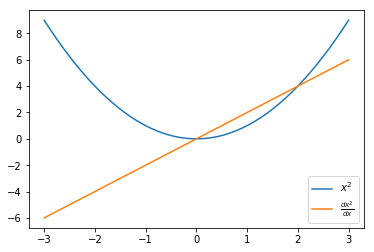

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3)
x_squared, x_squared_der = s.run([scalar_squared, derivative[0]],
                                 {my_scalar:x})

plt.plot(x, x_squared,label="$x^2$")
plt.plot(x, x_squared_der, label=r"$\frac{dx^2}{dx}$")
plt.legend();

# Why that rocks

In [29]:
my_vector = tf.placeholder('float32', [None])
# Compute the gradient of the next weird function over my_scalar and my_vector
# Warning! Trying to understand the meaning of that function may result in permanent brain damage
weird_psychotic_function = tf.reduce_mean(
    (my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 
    1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(
    2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2
                      )*tf.exp((my_scalar-4)**2)/(
    1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2)
                                    )/(1+tf.exp(-(my_scalar-4)**2)))**2

der_by_scalar = tf.gradients(weird_psychotic_function, my_scalar)
der_by_vector = tf.gradients(weird_psychotic_function, my_vector)

Instructions for updating:
Use tf.cast instead.


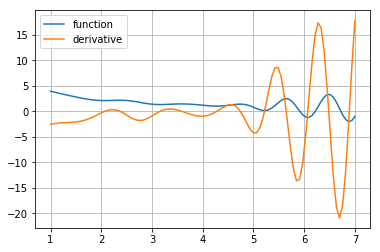

In [30]:
# Plotting the derivative
scalar_space = np.linspace(1, 7, 100)

y = [s.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 2, 3]})
     for x in scalar_space]

plt.plot(scalar_space, y, label='function')

y_der_by_scalar = [s.run(der_by_scalar,
                         {my_scalar:x, my_vector:[1, 2, 3]})
                   for x in scalar_space]

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend();

# Almost done - optimizers

While you can perform gradient descent by hand with automatic grads from above, tensorflow also has some optimization methods implemented for you. Recall momentum & rmsprop?

In [0]:
y_guess = tf.Variable(np.zeros(2, dtype='float32'))
y_true = tf.range(1, 3, dtype='float32')
loss = tf.reduce_mean((y_guess - y_true + tf.random_normal([2]))**2) 
#loss = tf.reduce_mean((y_guess - y_true)**2) 
optimizer = tf.train.MomentumOptimizer(0.01, 0.5).minimize(
    loss, var_list=y_guess)

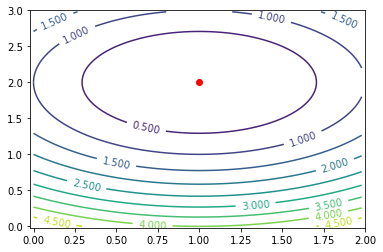

In [32]:
from matplotlib import animation, rc
import matplotlib_utils
from IPython.display import HTML, display_html

fig, ax = plt.subplots()
y_true_value = s.run(y_true)
level_x = np.arange(0, 2, 0.02)
level_y = np.arange(0, 3, 0.02)
X, Y = np.meshgrid(level_x, level_y)
Z = (X - y_true_value[0])**2 + (Y - y_true_value[1])**2
ax.set_xlim(-0.02, 2)
ax.set_ylim(-0.02, 3)
s.run(tf.global_variables_initializer())
ax.scatter(*s.run(y_true), c='red')
contour = ax.contour(X, Y, Z, 10)
ax.clabel(contour, inline=1, fontsize=10)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

guesses = [s.run(y_guess)]

def animate(i):
    s.run(optimizer)
    guesses.append(s.run(y_guess))
    line.set_data(*zip(*guesses))
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=20, blit=True)

In [33]:
try:
    display_html(HTML(anim.to_html5_video()))
# In case the build-in renderers are unaviable, fall back to
# a custom one, that doesn't require external libraries
except (RuntimeError, KeyError):
    anim.save(None, writer=matplotlib_utils.SimpleMovieWriter(0.001))

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAC66m1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAADIPZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8oYJVUBjg5Cl8UC950wnQObmxLpMS
eTd2N1o7ZvU7nZLqidQWs9IRqH4qZFuUNOvgrgAArGB7WlESNB735J/CfrjEy3i5zjzWx5r7oD4b
7vRGf5YZpSE2SfCltWRnqtLPBS3FxRjhpp/BEdar5txSfEu67R/ppgZwAi2i8ff512MwmU2ndVwZ
0/IypwbXeLiexIGKwjGLSLtuFQ6Y/OKysfXRdbpNhUrKtfRj7PsZ4sEuP5y4zl61S+z6VZzYCdA7
422O/g7ogLDysqUE24GpHGaJCX2wbS68ujTHQP6XxiSrNlnDwZHgbp5EeVkCuMJlhlbRejAAAW5E
i95ObYO5PsuB/yXJXIr296w2R4KtEWts2QxCeaTyILNtSj0FAa6n+Sm+7xuX2JriZx97d2rE/cAU
Qsh/+Ymis26EZW9S/cjgVqTEtyVS3CIlK2Ezdp99jK7/nX0GHUivuh8QdJ4bhVPEmo5B7TQYe9Nv
n+ebyMRkTx7hvj05vOEfMTes/dwPLUI91WSm8NQ11fuo1LrBS7pJhE73vxY1JjcZWnegaFLpPjAo
+BqceCYe5S3Av97ANnEBmzojm/SDmWarQluOhREg6XGZMu4a7snjhzyH4/KonlxVMyXTB8Ya3dGT
vrxM2T8GRxsFP+Ki2XIeafZhzaICPKgU1x2LYZqQc9bRDlrWDpuTNmcCbrO7DXBPWt4+vc4y9j4f
9IbTpWR0gti3hfugAL5SqzBQBPPDOD6Y8UFjbWEdqCKzj/3OA6QpBOtIpMv8RPGtEtT4zpsL5DgU
W7Veh556LI0Gg2s6EOTSBZVPhwxULIDHJ4lu03Q4tzre/frYdOiQv6jsVE3nfmYai+kwFdN6umAJ
NF2es2HeJ6s8al37PrMlToRBo4xG0fUr2D3h2KAIiqdNTLWxNiMbC0LlGN11lvyX+Ahm0GVXideP
ZkoIbgwLSFFn+qsWQi1gd5YlvJF+grCkWEC4T6N+MBdJXBfELB0P7DGADeeCiixt23fF6RarigDj
svDNkTR+V+9XUMdHw/r9y+xO7it8Vyuyb5IT0k1W8+dFsC6mgDXeLVn/GbNZF3YGWU5EG8Y7nNsj
bqko6CZeuErm8/ib08sKyMf/AAs7SrpKVD0cArb4AdKJIDbC2QNrWjiENcXzYlCSxePQmmUdD6Mp
RY+Ih/GAtAGYIicR2lJheHH0YIQkwjUDrCJbZFeCnESU2nGNJoBWg14ogfTtthCkfxV3eFvcRPTK
e+iEpUbwuIvmByipRxXu4m/5ZbB/ehGgXmszbLWVf+4PJebyN/wJxNw1Nrnm+FQmwW4U5fw9Uz+r
qw3L3V3bjLxkEL0N6FF3N23po/nf7SCqgtG2VPUz6EZ4DUBF9C7KDffgpo3XMOrCq0UelxcgbN5A
0BVURaH1iEZ0thD0RIdt8IMc7IvMYC4fUKDSWlLTx3Rn2vg1xTeIjoWnawISnUuTAgeNuhdyHwZ0
L9y6QJF7dDGmEBx2G8gLcI5UYPTDN71STlxmoRsXhCRfvFysfMcjpg5k1qs459KWwsyLeKD36EWR
QvjCUgtobDK0vn+lToJZzDw2LPj41HdFZ4GUgC+woiUC6bNdDA0VQ/ggV7PwTXzCmDDKwJOvcBGE
XuAh+gr4F6rXz071XuvnJnsoYPA0FCK64ypHxPUl0Lhq8fEME1eJb4NcTtI/TS65nCJUdMpA46Ev
BT99o/i4QlmyGpZMXdmf0ZBvR6T6Btxwt3PAaQVIZuNrsdj1NGyCXwnHIxTFqGsAwDgywa1R7XPT
srq7IBWGTZPwCRQAYMa3ixuXJgQEMbmfGIgCNj6J350MvUBV9UsmzWd9ZKKHEQkW/avZIKgXkWZC
wsEPQpfInl4W7sNehHscSQ6iY1EYowTYkrbWiW8ZNO3vHKtlf7gAIbIfsS30YogXjQD80UyzlOpV
nstBi0nEFYJzbRPp3Z1dysKg9MFa0DB92Q1NBqsCB+G4AQUl+BjY7LKPky0JmZCauW6cdAay0JLP
aYRjJ3UMNEfHhhsXA8B1RGd2NZooaTXn544v18cWFcRrXuEUl97TITldnYCQRfEaAFL2pnoOO+wv
odxXniGP7TAemSC1yPDBzoGf6WfXKcxwVXC/nA5Gg7//5cPAfhwd+gKRaEC81Sn08xm4kpo4mca9
hZxuTeNMwRMuL9yXQQmauCe3uNVe5LO0X9FVqA1xWVlWaqAi9FSYMMYAr/ii/jr++YbxNCRi3dgX
D1TuFuHplz/H0GUBpVbd1ZJ52yuqiGThmmkqN9IwDzn46P0sebGwjxu2wghcnfCxmvkaippiizdB
3Y9sL8LO2Gj5yBaiVxHkQGbo5On3+yJ1RwuFk9l2fYbtrgPH9ZF01jfRnIP8vJUT/DoiHNb7zUw9
milD0m+r+P8kGAWS5oNlKATuKhwLMgDQvL/2Xxjlzs4LzzJshq45AcjqNsJZAtUM/nkvT5c+tl99
LyNFA86+FmYJH4JADRpYYOg6NHMWsAwE1amLcFR9r0R4cEtKUAmpKcI/sJfRptbhPTp3pNXVZkOg
lxUAVXLxhAvM7ve5ct6bpU3I6pDH2Liipvmm6CmJ3v6yuNm3OOXwWQTatKKNmZ25NhR7ceooPg2G
NDGhgnZbnPJm8Rp525sJPs6z/SR7sklallac95AWnxIy2+rCNAy7o0LS+XRCi8zEf218IlxGL1Vz
0C6j9kt0+cpKE50f0Wjb/wgibTcyUS4u+pi0bEmRvFw8jNWtEf4XrkTeVHv7xnrEZnk30j5tonXH
bvbfiA6S2Jz6pQRKah4FvICQmDUzXnP9XqZ12kJBmPpEBqJ8ccAQFt/7gxhAY4uN7ztlgFkA87lX
FGQicH6wLEVRAZDiMfAOw

# Logistic regression
Your assignment is to implement the logistic regression

Plan:
* Use a shared variable for weights
* Use a matrix placeholder for `X`
 
We shall train on a two-class MNIST dataset
* please note that target `y` are `{0,1}` and not `{-1,1}` as in some formulae

In [34]:
from sklearn.datasets import load_digits
mnist = load_digits(2)

X, y = mnist.data, mnist.target

print("y [shape - %s]:" % (str(y.shape)), y[:10])
print("X [shape - %s]:" % (str(X.shape)))

y [shape - (360,)]: [0 1 0 1 0 1 0 0 1 1]
X [shape - (360, 64)]:


X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0.]]
y:
 [0 1 0 1 0 1 0 0 1 1]


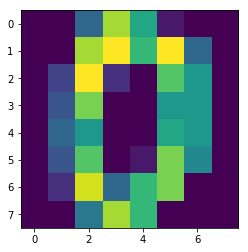

In [35]:
print('X:\n',X[:3,:10])
print('y:\n',y[:10])
plt.imshow(X[0].reshape([8,8]));

It's your turn now!
Just a small reminder of the relevant math:

$$
P(y=1|X) = \sigma(X \cdot W + b)
$$
$$
\text{loss} = -\log\left(P\left(y_\text{predicted} = 1\right)\right)\cdot y_\text{true} - \log\left(1 - P\left(y_\text{predicted} = 1\right)\right)\cdot\left(1 - y_\text{true}\right)
$$

$\sigma(x)$ is available via `tf.nn.sigmoid` and matrix multiplication via `tf.matmul`

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

__Your code goes here.__ For the training and testing scaffolding to work, please stick to the names in comments.

In [37]:
# Model parameters - weights and bias
# weights = tf.Variable((tf.ones((X.shape[1],1))), name = "weights") #shape should be (X.shape[1], 1)
weights = tf.Variable(tf.truncated_normal((X.shape[1],1),stddev=0.1),name='weight')
print(weights.shape)
b = tf.Variable([0.1],dtype='float32', name = "bias")
print(b.dtype)

(64, 1)
<dtype: 'float32_ref'>


In [0]:
# Placeholders for the input data
# input_X = tf.placeholder('float32', shape = [None, X.shape[1]],name="inputx")
# print(input_X.shape, input_X.dtype)
# input_y = tf.placeholder('float32', shape = [None,], name="input_y")

input_X =  tf.placeholder( tf.float32,  (None, None) )
input_y =  tf.placeholder( tf.float32,  (None, ) )

In [39]:
# The model code

# Compute a vector of predictions, resulting shape should be [input_X.shape[0],]
# This is 1D, if you have extra dimensions, you can  get rid of them with tf.squeeze .
# Don't forget the sigmoid.
logits = tf.nn.bias_add(tf.matmul(input_X,weights),b)
print("logits done")
predicted_y = tf.squeeze(tf.nn.sigmoid(logits))

# Loss. Should be a scalar number - average loss over all the objects
# tf.reduce_mean is your friend here
# loss = tf.losses.log_loss(labels=y_train, predictions=predicted_y)
# loss = <logistic loss (scalar, mean over sample)>
ttl_loss = -tf.log(predicted_y)*input_y - tf.log(1-predicted_y)*(1-input_y) 
loss = tf.reduce_mean(ttl_loss)

# See above for an example. tf.train.*Optimizer
# optimizer = <optimizer that minimizes loss>
optimizer = tf.train.MomentumOptimizer(0.01, 0.5).minimize(loss)

logits done


A test to help with the debugging

In [40]:
from google.colab import files
uploaded = files.upload()

Saving validation_predictons.txt to validation_predictons (1).txt


In [41]:
print(X.dtype, X.shape)

float64 (360, 64)


In [0]:
validation_weights = 1e-3 * np.fromiter(map(lambda x:
        s.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 0.1, 2]}),
                                   0.15 * np.arange(1, X.shape[1] + 1)),
                                   count=X.shape[1], dtype=np.float32)[:, np.newaxis]

In [0]:
# Compute predictions for given weights and bias
prediction_validation = s.run(
    predicted_y, {
    input_X: X,
    weights: validation_weights,
    b: [1e-1]})

# Load the reference values for the predictions
validation_true_values = np.loadtxt("validation_predictons.txt")

assert prediction_validation.shape == (X.shape[0],),\
       "Predictions must be a 1D array with length equal to the number " \
       "of examples in input_X"
assert np.allclose(validation_true_values, prediction_validation)
loss_validation = s.run(
        loss, {
            input_X: X[:100],
            input_y: y[-100:],
            weights: validation_weights+1.21e-3,
            b: [-1e-1]})
assert np.allclose(loss_validation, 0.728689)

In [44]:
print(input_X.shape)
print(input_X.dtype)
print(y[-100:].shape)
print(weights.shape)

(?, ?)
<dtype: 'float32'>
(100,)
(64, 1)


In [0]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")

In [46]:
print(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)
print(predicted_y.dtype)

float32 float32 float32 float32
<dtype: 'float32'>


In [47]:
print(input_X.shape, X_train.shape)
print(input_y.shape, y_train.shape)

(?, ?) (270, 64)
(?,) (270,)


In [0]:
s.run(tf.global_variables_initializer())

In [49]:
from sklearn.metrics import roc_auc_score
s.run(tf.global_variables_initializer())
for i in range(5):
    print(input_X.dtype, X_train.dtype)
#     s.run(optimizer, {input_X: X_train, input_y: y_train})
#     loss_i = s.run(loss, {input_X: X_train, input_y: y_train})
#     print("loss at iter %i:%.4f" % (i, loss_i))
#     print("train auc:", roc_auc_score(y_train, s.run(predicted_y, {input_X:X_train})))
#     print("test auc:", roc_auc_score(y_test, s.run(predicted_y, {input_X:X_test})))

<dtype: 'float32'> float32
<dtype: 'float32'> float32
<dtype: 'float32'> float32
<dtype: 'float32'> float32
<dtype: 'float32'> float32


### Coursera submission

In [0]:
grade_submitter = grading.Grader("BJCiiY8sEeeCnhKCj4fcOA")

In [0]:
test_weights = 1e-3 * np.fromiter(map(lambda x:
    s.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 2, 3]}),
                               0.1 * np.arange(1, X.shape[1] + 1)),
                               count=X.shape[1], dtype=np.float32)[:, np.newaxis]

First, test prediction and loss computation. This part doesn't require a fitted model.

In [0]:
prediction_test = s.run(
    predicted_y, {
    input_X: X,
    weights: test_weights,
    b: [1e-1]})

In [0]:
assert prediction_test.shape == (X.shape[0],),\
       "Predictions must be a 1D array with length equal to the number " \
       "of examples in X_test"

In [0]:
grade_submitter.set_answer("0ENlN", prediction_test)

In [0]:
loss_test = s.run(
    loss, {
        input_X: X[:100],
        input_y: y[-100:],
        weights: test_weights+1.21e-3,
        b: [-1e-1]})
# Yes, the X/y indices mistmach is intentional

In [0]:
grade_submitter.set_answer("mMVpM", loss_test)

In [0]:
grade_submitter.set_answer("D16Rc", roc_auc_score(y_test, s.run(predicted_y, {input_X:X_test})))

Please use the credentials obtained from the Coursera assignment page.

In [61]:
grade_submitter.submit("nimi.wang@capitalone.com", "iA6iBk1acrVcCCf4")

You used a token for "MNIST digits classification with TF" in "Introduction to Deep Learning". Please use a token for the assignment you are submitting.
